#Algoritmos de clasificación
Alejandro Pizarro A01633784


En canvas podrás encontrar la base de datos "iris-data". Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random.mtrand import logistic
import statsmodels.api as sm
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [2]:
# Leemos la base de datos "iris-data"
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estadística/Actividades en clase/datasets/Iris.csv')

In [3]:
# Realizamos una primera visualización de los datos
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Borramos la variable "Id" de la base de datos
df.drop('Id', axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


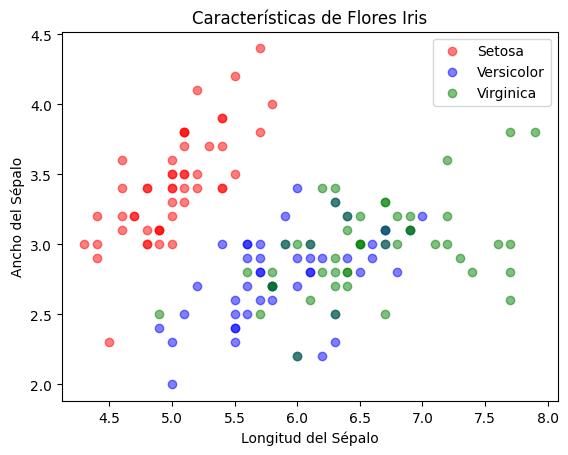

In [5]:
# Dividir el DataFrame en tres especies diferentes: Iris-setosa, Iris-versicolor e Iris-virginica
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Crear el scatter plot
plt.title('Características de Flores Iris')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Ancho del Sépalo')

plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], color='red', label='Setosa', alpha=0.5)
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], color='blue', label='Versicolor', alpha=0.5)
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], color='green', label='Virginica', alpha=0.5)

plt.legend()
plt.show()

In [6]:
# Dividimos los datos en caracteristicas (X) y etiquetas (y)
X = df.drop("Species", axis=1)
y = df["Species"]

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Regresión Logísitica

In [7]:
# X_train
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
# X_test
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_preds = logistic.predict(X_test)
print(logistic_preds)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [9]:
# Precision del modelo
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_confusion = confusion_matrix(y_test, logistic_preds)
print('Exactitud del modelo de regresión logística: ', logistic_accuracy)
print('Matriz de confusion:\n', logistic_confusion)

Exactitud del modelo de regresión logística:  1.0
Matriz de confusion:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


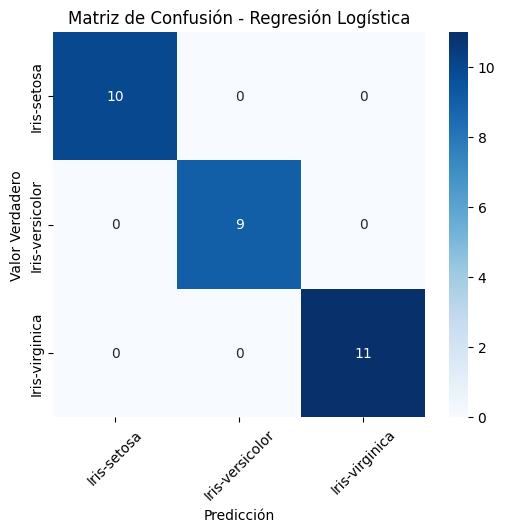

In [10]:
# Grafica

# Etiquetas de las clases
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(logistic_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

##Naive Bayes

In [11]:
# Modelo
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print(nb_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [12]:
# Precision del modelo
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_confusion = confusion_matrix(y_test, nb_pred)
print('Exactitud del modelo Naive Bayes: ', nb_accuracy)
print('Matriz de confusion:\n', nb_confusion)

Exactitud del modelo Naive Bayes:  1.0
Matriz de confusion:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


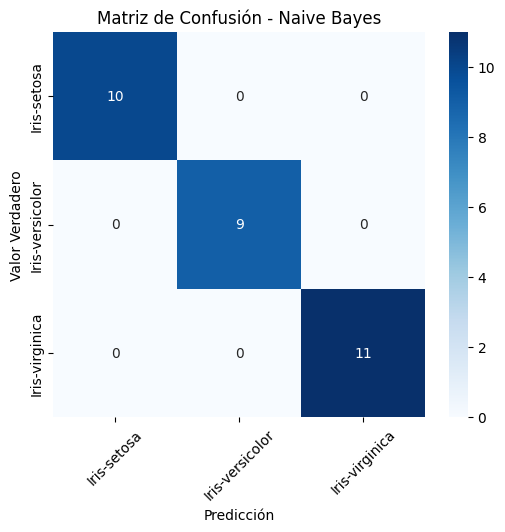

In [13]:
# Grafica

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(nb_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Naive Bayes')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

##Análisis de discriminante

In [14]:
adl_model = LinearDiscriminantAnalysis()
adl_model.fit(X_train, y_train)
adl_pred = adl_model.predict(X_test)
print(adl_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [15]:
# Precision del modelo
adl_accuracy = accuracy_score(y_test, adl_pred)
adl_confusion = confusion_matrix(y_test, adl_pred)
print('Exactitud del modelo Naive Bayes: ', adl_accuracy)
print('Matriz de confusion:\n', adl_confusion)

Exactitud del modelo Naive Bayes:  1.0
Matriz de confusion:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


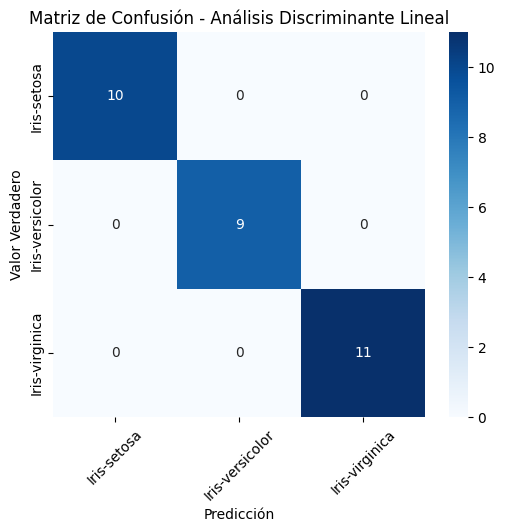

In [16]:
# Grafica

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(adl_confusion, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Análisis Discriminante Lineal')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.show()

##Conclusiones

Tras llevar a cabo los cálculos pertinentes, se ha confirmado que los tres modelos (Regresión Logística, Naive Bayes y Análisis de Discriminante) exhiben una precisión perfecta de 1.0. Este nivel de precisión se mantiene incluso después de la estandarización de los datos. Estos resultados sugieren que, en el contexto de este conjunto de datos en particular, la elección del modelo carece de relevancia, dado que los tres demuestran una precisión idéntica.